In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import * #importing libraries
from fastai.metrics import error_rate


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset'
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=244, bs=16, valid_pct=0.3).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.652986,0.348855,0.875000,02:27
1,0.506308,0.251966,0.903846,02:28
2,0.387776,0.208781,0.929487,02:24
3,0.297858,0.184608,0.923077,02:25
4,0.248602,0.190930,0.923077,02:26


In [ ]:
inter = ClassificationInterpretation.from_learner(learn)

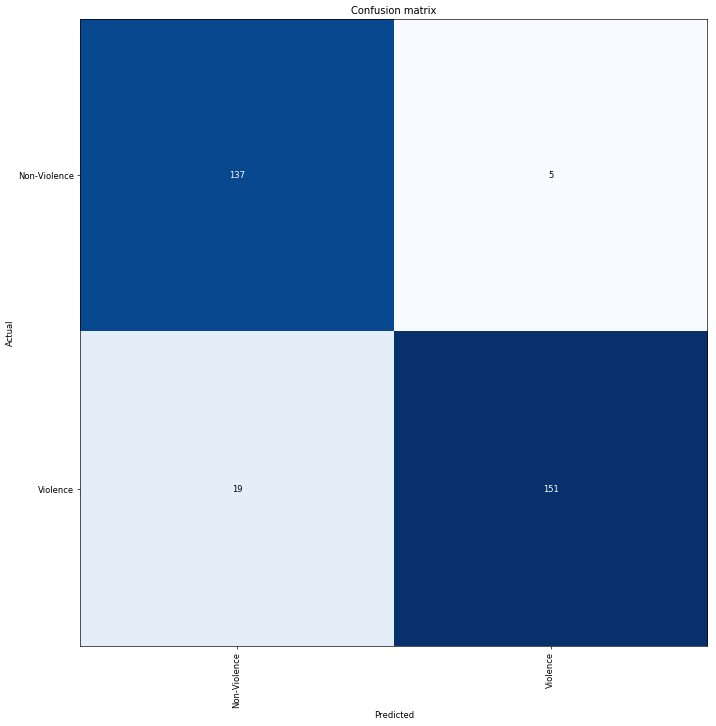

In [ ]:
inter.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
learn.save('violence_2019')

In [ ]:
learn.load('violence_2019')

Learner(data=ImageDataBunch;

Train: LabelList (729 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Violence,Violence,Violence,Violence,Violence
Path: /content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset;

Valid: LabelList (312 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
Violence,Non-Violence,Violence,Violence,Non-Violence
Path: /content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4)

Detected Violence


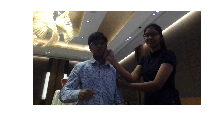

In [ ]:
img = open_image('/content/drive/My Drive/1. Fight Unusual Behavior in School/Unusual Behaviour Dataset/Model2_Dataset/Violence/WIN_20190910_12_57_34_Pro.jpg')
pred_class,pred_idx,outputs = learn.predict(img)
img.show()
print ("Detected", pred_class)